In [1]:
cd /content/drive/My Drive/Unsupervised_Learning

/content/drive/My Drive/Unsupervised_Learning


In [2]:
ls

basicPythonBenchmark.csv       randomBenchmark.csv     testOrderBenchmark.zip
basicPythonBenchmark.zip       randomBenchmark.zip     train.csv
data.zip                       test.csv                Untitled0.ipynb
expedia-personalized-sort.zip  testOrderBenchmark.csv


In [0]:
!unzip expedia-personalized-sort.zip

Archive:  expedia-personalized-sort.zip
  inflating: basicPythonBenchmark.zip  
  inflating: data.zip                
  inflating: randomBenchmark.zip     
  inflating: testOrderBenchmark.zip  


In [0]:
ls

basicPythonBenchmark.zip  expedia-personalized-sort.zip  testOrderBenchmark.zip
data.zip                  randomBenchmark.zip            Untitled0.ipynb


In [0]:
!unzip basicPythonBenchmark.zip

Archive:  basicPythonBenchmark.zip
  inflating: basicPythonBenchmark.csv  


In [0]:
!unzip testOrderBenchmark.zip

Archive:  testOrderBenchmark.zip
  inflating: testOrderBenchmark.csv  


In [0]:
!unzip expedia-personalized-sort.zip

Archive:  expedia-personalized-sort.zip
replace basicPythonBenchmark.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: basicPythonBenchmark.zip  
replace data.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: data.zip                y

replace randomBenchmark.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename:   inflating: randomBenchmark.zip     
replace testOrderBenchmark.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: testOrderBenchmark.zip  


In [0]:
!unzip randomBenchmark.zip

Archive:  randomBenchmark.zip
  inflating: randomBenchmark.csv     


In [0]:
!unzip data.zip

Archive:  data.zip
  inflating: test.csv                
  inflating: train.csv               


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
train = pd.read_csv('train.csv',nrows=300000)
test  = pd.read_csv('test.csv')

In [5]:
train.head()

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,position,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,srch_query_affinity_score,orig_destination_distance,random_bool,comp1_rate,comp1_inv,comp1_rate_percent_diff,comp2_rate,comp2_inv,comp2_rate_percent_diff,comp3_rate,comp3_inv,comp3_rate_percent_diff,comp4_rate,comp4_inv,comp4_rate_percent_diff,comp5_rate,comp5_inv,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,1,2.83,0.0438,4.95,27,104.77,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,1,2.20,0.0149,5.03,26,170.74,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,1,2.20,0.0245,4.92,21,179.80,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,1,2.83,0.0125,4.39,34,602.77,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,-1.0,0.0,5.0,-1.0,0.0,5.0,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,0.0,5.0,0,NaN,0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,1,2.64,0.1241,4.93,4,143.58,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0


In [6]:
train.isna().sum()

srch_id                             0
date_time                           0
site_id                             0
visitor_location_country_id         0
visitor_hist_starrating        284121
visitor_hist_adr_usd           284060
prop_country_id                     0
prop_id                             0
prop_starrating                     0
prop_review_score                 434
prop_brand_bool                     0
prop_location_score1                0
prop_location_score2            64721
prop_log_historical_price           0
position                            0
price_usd                           0
promotion_flag                      0
srch_destination_id                 0
srch_length_of_stay                 0
srch_booking_window                 0
srch_adults_count                   0
srch_children_count                 0
srch_room_count                     0
srch_saturday_night_bool            0
srch_query_affinity_score      280652
orig_destination_distance       96417
random_bool 

In [0]:
columns = ['srch_id','date_time','site_id','visitor_location_country_id','position','price_usd','srch_destination_id','srch_length_of_stay','srch_room_count','srch_saturday_night_bool']

In [0]:
df = train[columns]

In [9]:
df.shape

(300000, 10)

In [10]:
df.head()

,srch_id,date_time,site_id,visitor_location_country_id,position,price_usd,srch_destination_id,srch_length_of_stay,srch_room_count,srch_saturday_night_bool
0,1,2013-04-04 08:32:15,12,187,27,104.77,23246,1,1,1
1,1,2013-04-04 08:32:15,12,187,26,170.74,23246,1,1,1
2,1,2013-04-04 08:32:15,12,187,21,179.80,23246,1,1,1
3,1,2013-04-04 08:32:15,12,187,34,602.77,23246,1,1,1
4,1,2013-04-04 08:32:15,12,187,4,143.58,23246,1,1,1


In [11]:
df['srch_id'].unique()

array([    1,     4,     6, ..., 20071, 20073, 20074])

In [12]:
df['site_id'].unique()

array([12,  5, 14, 18, 15, 24, 22, 32, 16, 31, 23,  9, 10, 26,  7, 25, 21,
       29, 17, 27,  4, 13, 34, 19, 28,  2, 11,  1,  6, 30,  3, 33])

In [0]:
#removing srch_id column
del df['srch_id']

In [14]:
df["date_time"] = pd.to_datetime(df["date_time"])
cols = {}
for col in ["month", "day", "hour", "minute", "dayofweek", "quarter"]:
    cols[col] = getattr(df["date_time"].dt, col)
df = df.join(pd.DataFrame(cols))


# test["date_time"] = pd.to_datetime(test["date_time"])
# props = {}
# for prop in ["month", "day", "hour", "minute", "dayofweek", "quarter"]:
#     props[prop] = getattr(test["date_time"].dt, prop)
# test = test.join(pd.DataFrame(props))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
df.head()

,date_time,site_id,visitor_location_country_id,position,price_usd,srch_destination_id,srch_length_of_stay,srch_room_count,srch_saturday_night_bool,month,day,hour,minute,dayofweek,quarter
0,2013-04-04 08:32:15,12,187,27,104.77,23246,1,1,1,4,4,8,32,3,2
1,2013-04-04 08:32:15,12,187,26,170.74,23246,1,1,1,4,4,8,32,3,2
2,2013-04-04 08:32:15,12,187,21,179.80,23246,1,1,1,4,4,8,32,3,2
3,2013-04-04 08:32:15,12,187,34,602.77,23246,1,1,1,4,4,8,32,3,2
4,2013-04-04 08:32:15,12,187,4,143.58,23246,1,1,1,4,4,8,32,3,2


In [0]:
del df['date_time']

In [17]:
df['visitor_location_country_id'].unique()

array([187, 219, 100, 129,  55, 216,  92, 220,  77,  31, 205,  99,  69,
       181,  35,  59,   4,  39, 215,  41,  85,  73, 132,  98, 138,  79,
        68, 106, 130,  81,  18,  50, 224,   9,  32,  23,  53, 158, 206,
       103,  15, 149, 214, 160, 137,   2, 178,  56, 117,  13,  33, 125,
        14,   6,  16, 202,  70,  42, 123,  90,  72,  65, 212, 162,  97,
        10, 145, 154,  26, 146, 127,  45,   5, 155, 223,  80, 229,  88,
       211,  78, 126,  38,  91, 184,  60, 194, 142,  86, 113, 109, 102,
        11,  47, 221,  57,  40, 173, 164,  36, 186, 128, 177,  37, 114,
        21, 230,  93, 131, 167,  28, 115, 134, 120,  63, 153,  22, 213,
        51,  84, 204, 107, 157,  74,  30, 182, 231])

In [18]:
df['visitor_location_country_id'].value_counts()

219    177187
100     28555
55      17721
216     13433
220     10892
        ...  
182        20
37         20
115        15
22          9
146         8
Name: visitor_location_country_id, Length: 126, dtype: int64

In [0]:
del df['visitor_location_country_id']

In [0]:
from sklearn.decomposition import PCA

In [0]:
pca = PCA(n_components=5,random_state=42)

In [0]:
pca.fit(df)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

In [0]:
pca.components_

array([[ 1.40455384e-05,  1.49926129e-05, -7.27805780e-06,
         2.14049688e-03,  9.99997709e-01, -2.29742245e-06,
        -9.39304765e-08,  6.87835210e-07,  6.68666978e-07,
        -1.40628868e-05,  3.36259885e-06, -3.03922823e-06,
         5.96449784e-08,  2.10224769e-07],
       [-1.67998921e-05, -1.52264517e-04, -5.91473019e-05,
         9.99997692e-01, -2.14049375e-03,  2.14020389e-05,
         7.29895869e-06,  5.12491741e-07,  2.41006774e-05,
         6.20907323e-05,  1.05919464e-05,  4.37505758e-05,
         1.12321705e-05,  9.08970313e-06],
       [ 3.48425962e-02, -9.99378929e-01, -3.44376388e-03,
        -1.51926488e-04,  1.48104134e-05,  2.68456051e-03,
         1.66564641e-04, -4.57522129e-04, -1.43622848e-04,
         1.25267927e-03,  2.59133679e-03,  2.68854126e-04,
        -2.13326102e-04, -1.82394374e-06]])

In [0]:
coef = pca.transform(df)

In [0]:
coef.shape

(300000, 3)

In [0]:
dff = pd.DataFrame(coef)

In [0]:
dff.head()

,0,1,2
0,9211.064775,-91.308231,-10.698791
1,9211.205991,-25.338324,-10.705370
2,9211.225420,-16.278049,-10.689527
3,9212.130691,406.690206,-10.798557
4,9211.148015,-52.496960,-10.625481


In [0]:
from sklearn.cluster import KMeans

In [0]:
inertias = []

In [0]:
for k in range(1,15):
  kmeanModel = KMeans(n_clusters=k)
  kmeanModel.fit(df)
  inertias.append(kmeanModel.inertia_)



In [0]:
K = range(1,15)

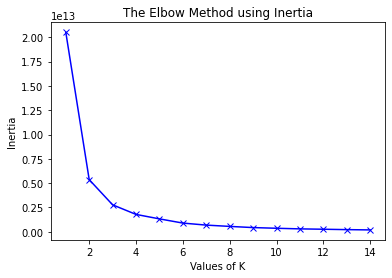

In [44]:
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia')
plt.savefig('kmeans.jpg') 
plt.show() 

In [39]:
#No of clusters - 8 (optimal)
model = KMeans(n_clusters=8)
model.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
centers = model.cluster_centers_

In [0]:
centers = np.array(centers,dtype='uint8')

In [43]:
print(centers)

[[  9  17 165 161   2   1   0   5  15  13  29   2   2]
 [ 10  16 159 190   2   1   0   5  15  13  29   2   2]
 [  9  17 167  98   2   1   0   5  15  13  29   2   2]
 [  9  16 171  51   2   1   0   5  15  13  29   2   2]
 [ 10  16 168   6   2   1   0   5  15  13  29   2   2]
 [ 10  16 151  45   2   1   0   5  15  13  29   2   2]
 [  5  12 243   8   3   2   0   9  22  15  38   5   3]
 [ 10  16 176  21   2   1   0   5  15  13  29   2   2]]
